In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('airlines_flights_data.csv')

In [5]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [9]:
df = pd.read_csv('airlines_flights_data.csv',index_col=0)

In [9]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
index,,,,,,,,,,,
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099


# Preprocessing

In [43]:
df.info

<bound method DataFrame.info of          airline   flight source_city departure_time stops   arrival_time  \
index                                                                       
0       SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1       SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2        AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3        Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4        Vistara   UK-963       Delhi        Morning  zero        Morning   
...          ...      ...         ...            ...   ...            ...   
300148   Vistara   UK-822     Chennai        Morning   one        Evening   
300149   Vistara   UK-826     Chennai      Afternoon   one          Night   
300150   Vistara   UK-832     Chennai  Early_Morning   one          Night   
300151   Vistara   UK-828     Chennai  Early_Morning   one        Evening   
300152   Vistara   UK-822     Chennai       

In [11]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [15]:
df.shape

(300153, 12)

In [45]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [23]:
df.duplicated().sum()

0

In [47]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

# Deleting some columns

In [11]:
df=df.drop(columns=['flight','arrival_time'])

In [13]:
df.head()

,airline,source_city,departure_time,stops,destination_city,class,duration,days_left,price
index,,,,,,,,,
0,SpiceJet,Delhi,Evening,zero,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Mumbai,Economy,2.33,1,5955


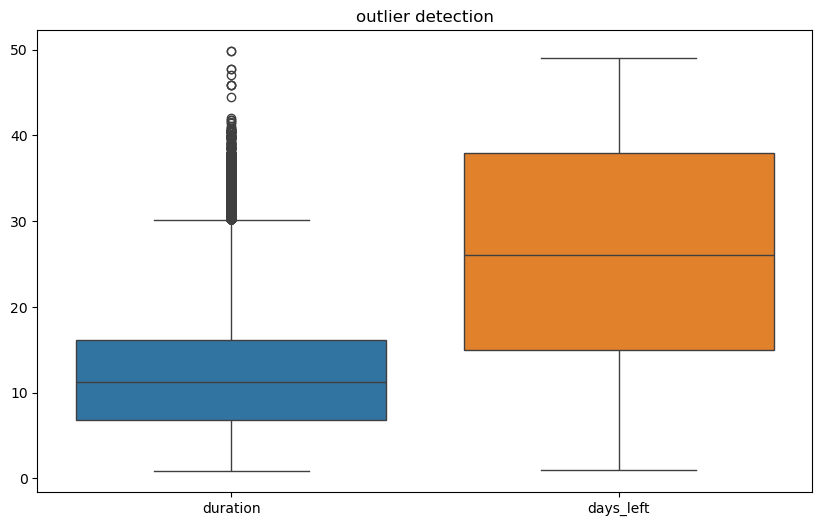

In [15]:
# checking for outliers 
numerical_columns = ['duration','days_left']
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numerical_columns])
plt.title('outlier detection')
plt.show()

In [17]:
# treating the outliers 
outlier_column = ['duration']

# calculate the quartiles and IQR for the outlier column
q1 = df[outlier_column].quantile(0.25)
q3 = df[outlier_column].quantile(0.75)

IQR = q3 - q1

# outlier treating using iqr method ( capping of 1.5 times IQR)
outliers_lower = df[outlier_column] < (q1 - 1.5 * IQR)
outliers_upper = df[outlier_column] > (q3 + 1.5 *IQR)

In [19]:
# cap the outliers to 1.5 times iqr
df[outlier_column] = df[outlier_column].clip(lower=q1-1.5 * IQR, upper=q3 + 1.5 * IQR, axis=1)

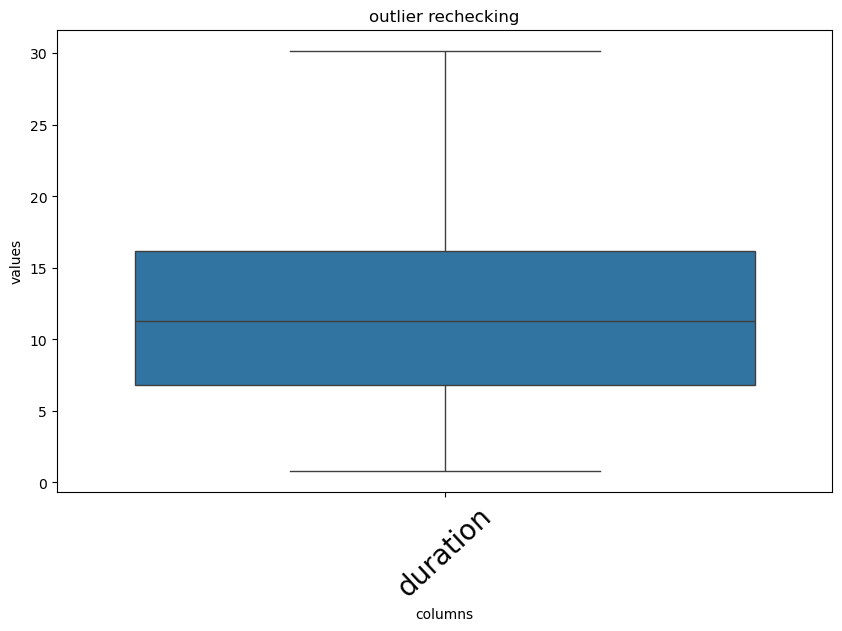

In [21]:
# rechecking the outlier
outliers_recheck = ['duration']
plt.figure(figsize=(10,6))
sns.boxplot(data=df[outliers_recheck])
plt.title('outlier rechecking')
plt.xlabel('columns')
plt.ylabel('values')
plt.xticks(rotation=43, fontsize=20)
plt.show()

In [63]:
df.head()

,airline,source_city,departure_time,stops,destination_city,class,duration,days_left,price
index,,,,,,,,,
0,SpiceJet,Delhi,Evening,zero,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Mumbai,Economy,2.33,1,5955


In [66]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [68]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [70]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [72]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [74]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

# encoding the categorical columns

In [23]:
# encoding columns using OneHotEncoding
df = pd.get_dummies(df, columns=['airline', 'source_city', 'departure_time', 'destination_city'], drop_first=True)

In [25]:
# encoding columns using LabelEncoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class']=le.fit_transform(df['class'])

In [27]:
df.head()

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
index,,,,,,,,,,,,,,,,,,,,,
0,zero,1,2.17,1,5953,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
1,zero,1,2.33,1,5953,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,True
2,zero,1,2.17,1,5956,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,zero,1,2.25,1,5955,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
4,zero,1,2.33,1,5955,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True


In [29]:
# using map for 'stops' column
stops_map = {
    'zero': 0,
    'one': 1,
    'two_or_more': 2
}

df['stops'] = df['stops'].map(stops_map)

In [31]:
df.head()

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
index,,,,,,,,,,,,,,,,,,,,,
0,0,1,2.17,1,5953,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
1,0,1,2.33,1,5953,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,True
2,0,1,2.17,1,5956,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0,1,2.25,1,5955,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
4,0,1,2.33,1,5955,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True


In [35]:
df = df.astype(int)

In [37]:
df.head()

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
index,,,,,,,,,,,,,,,,,,,,,
0,0,1,2,1,5953,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,1,2,1,5953,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0,1,2,1,5956,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,1,2,1,5955,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,0,1,2,1,5955,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


# Scaling 

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['duration', 'days_left']] = scaler.fit_transform(df[['duration', 'days_left']])

# Splitting the dataset for Testing & Training

In [41]:
x = df.drop(columns=['price'])
y = df['price']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [45]:
x_train.head()

,stops,class,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,...,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
index,,,,,,,,,,,,,,,,,,,,,
148417,1,1,1.013786,-1.475170,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
36879,2,1,-0.666386,-0.958983,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
274531,1,0,1.293814,1.326987,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
166397,1,1,-0.246343,-1.106465,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
272722,1,0,1.993886,-1.548911,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0


# Model Creating 

In [47]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [49]:
models = {
    'Linear Regression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Decision Tree Regression':DecisionTreeRegressor(),
    'Random Forest Regressor':RandomForestRegressor()
}    

In [51]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [53]:
results = {}
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    results[name]= {
        'MAE':mean_absolute_error(y_test,y_pred),
        'MSR':mean_squared_error(y_test,y_pred),
        'RMSE':np.sqrt(mean_squared_error(y_test,y_pred)),
        'R2 Score': r2_score(y_test,y_pred)
    }  

# Result

In [55]:
result_df =pd.DataFrame(results).T
print(result_df)

                                  MAE           MSR         RMSE  R2 Score
Linear Regression         4507.070229  4.669526e+07  6833.392978  0.909414
Lasso                     4505.896476  4.669839e+07  6833.622359  0.909408
Ridge                     4507.059636  4.669524e+07  6833.391756  0.909414
Decision Tree Regression  1833.840681  2.077334e+07  4557.778470  0.959701
Random Forest Regressor   1662.557138  1.447599e+07  3804.733039  0.971918


In [58]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid={'n_estimators':[50,100,200],'max_depth':[None,10,20],'max_features':[8,'sqrt']}
grid_search=GridSearchCV(RandomForestRegressor(),param_grid,cv=3,scoring='r2')
grid_search.fit(x_train,y_train) 

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [8, 'sqrt'],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [62]:
y_pred_best = grid_search.best_estimator_.predict(x_test)
print("Best Parameters:",grid_search.best_params_)
print("Best R2 score:",r2_score(y_test,y_pred_best))

Best Parameters: {'max_depth': 20, 'max_features': 8, 'n_estimators': 200}
Best R2 score: 0.9766804162074424
